# Ajuste de Curvas
<div class="alert alert-block alert-success">
    <b>Notas de aula baseadas no livro: </b> 
    <p>Algoritmos Numéricos, do autor Frederico Campos
</div>

## Relações entre variáveis
As relações entre as variáveis envolvidas em um experimento podem ser classificadas em três tipos: determinísticas, semideterminísticas e empíricas.

- **Relações determinísticas:** quando as variáveis estão frequentemente relacionadas entre si por algum tipo de lei que pode ser expressa por uma fórmula matemática precisa e qualquer análise adicional faz-se desnecessária para relacionar estas variáveis. 
Como exemplo, a expressão da Matemática Financeira:
$$v=r(1+j)^m$$
denota  que um valor presente de $r$ reais investido a uma taxa $j$ ao longo de um tempo $m$ representa um valor futuro de $v$ reais.

- **Relações semideterminísticas:** quando alguma teoria prescreve a relação entre as variáveis mas ainda não se conhece valores particulares dos parâmetros aparecem na relação. Por exemplo, a concentração $c$ de uma substância após um tempo $t$ em uma reação 
química de primeira ordem é
$$c=c_0 e^{-kt},$$
onde $c_0$ é a concentração inicial da substância e $k$ é a constante de velocidade de uma reação específica. 

- **Relações empíricas:** quando não se conhece uma relação entre as variáveis envolvidas e deseja-se apresentar uma fórmula matemática que modele essa relação. Somente após ter suficiente conhecimento da relação empírica que uma relação semideterminísticas
pode ser apresentada. Existe uma área da Estatística denominada **análise de regressão** que trabalham dentre dessa perspectiva.


O que se busca é relacionar, por meio de um modelo matemático, a **variável resposta** (ou dependente) com o conjunto de **variáveis explicativas** (ou independentes) para ter controle, determinar algum parâmetro ou mesmo fazer previsão acerca do comportamento da variável resposta.

##  Regressão linear simples
Começaremos pela relação mais simples entre duas variáveis, no caso a relação linear, também conhecida como regressão linear.
Dada a tabela a seguir suponha que exista uma relação linear entre as variáveis $x$ e $y$. A regressão linear consiste em determinar
os parâmetros $a$ e $b$ na relação $y=a +bx$.

\begin{array}{|c|c|c|c|c|c|}
	\hline x & 0.3 & 2.7 & 4.5 & 5.9 & 7.8\\ 
	\hline y & 1.8 & 1.9 & 3.1 & 3.9 & 3.3\\ 
	\hline 
\end{array} 


Utilizando um gráfico de dispersão percebemos que os valores não estão contidos em um reta.
<img src="img/dispersao1.png" width="100%" height="100%">

Inicialmente poderíamos pensar em traçar um polinômio interpolador que passa pelos pontos (0.3,1.8) e (7.8,3.3). Sendo assim, teríamos $p(x)=1.74+0.2x$.

**Exercício:** Plot uma reta entre os pontos (0.3,1.8) e (7.8,3.3). 

p =

@(x) 1.74 + 0.2 * x



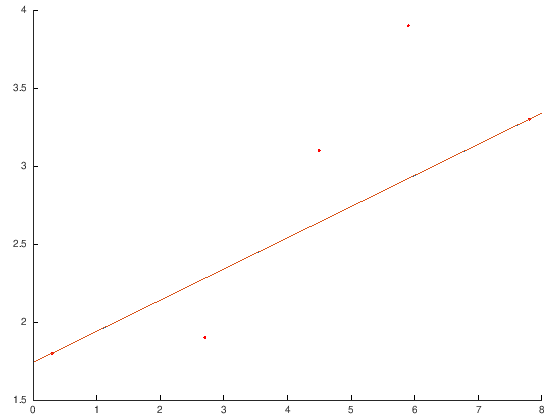

In [1]:
x = [0.3 2.7 4.5 5.9 7.8];
y = [1.8 1.9 3.1 3.9 3.3];
scatter(x, y, 'r');
hold on
plot([x(1) x(5)], [y(1) y(5)])
p = @(x) 1.74 + 0.2*x
plot(linspace(0,8), p(linspace(0,8)))

Dessa forma, existe um erro ao aproximar a relação entre $x$ e $y$ por uma reta,
ou seja, $$y=a+bx + \varepsilon$$
onde $a$ e $b$ são os parâmetros de ajuste e $\varepsilon$ é o erro cometido
ao considerar a relação linear entre $x$ e $y$. 

Um modo de verificar a qualidade do ajuste seria calcular a soma de todas as distâncias verticais $d_i$ dos pontos tabelados $y_i$ ao correspondente valor apontado
pelo polinômio interpolador, no caso, $p_i = p(x_i)$. Denotemos por $D(1.74,0.2)$ 
essa soma.
$$D(1.74,0.2) = \sum^5_{i=1}(y_i-(1.74+0.2x_i))^2=1.3164.$$

Contudo, ao escolher um segundo polinômio que nem mesmo passa sobre os pontos tabelados, e que passa por, digamos, (2,2) e (6,3). Isso nos conduziria ao polinômio $q(x) = 1.5 + 0.25x$. 

**Exercício:** Plot uma reta entre os pontos (2,2) e (6,3). 

q =

@(x) 1.5 + 0.25 * x

soma = 0
soma =  1.2300


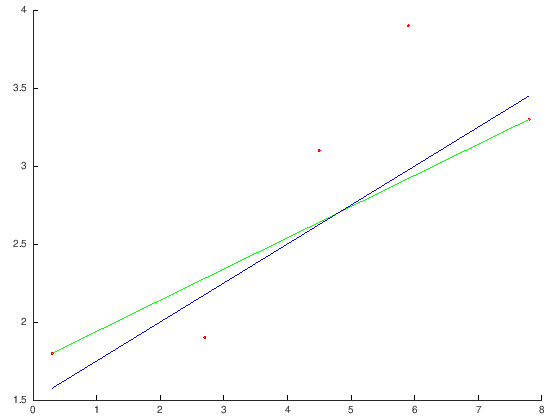

In [3]:
q = @(x) 1.5 + 0.25*x
soma = 0
for i=1:5
    soma = soma + (y(i) - q(x(i)))^2;
end
soma

scatter(x, y, 'r');
hold on
plot(x, p(x), 'g')
plot(x, q(x), 'b')

Mais uma vez, ao analisarmos $D(1.5,0.25)$, notamos que $D(1.5,0.25) = 1.23 < D(1.74,0.2)=1.3164$ o que qualifica $q(x)$ como um melhor ajuste. 

Então, como proceder para obter a melhor regressão linear?

## Método dos quadrados mínimos
O método dos quadrados mínimos consiste em encontrar um estimativa da reta $y=a+bx$ de modo a produzir o menor valor possível do desvio 
$$D(a,b)=\sum_{i=1}^m(y_i-u_i)^2 = \sum_{i=1}^m(y_i-a-bx_i)^2,$$
cujas derivadas parciais são

$$\frac{\partial D(a,b)}{\partial(a)} = -2 \sum_{i=1}^m(y_i-a-bx_i) $$ e
$$\frac{\partial D(a,b)}{\partial(b)} = -2 \sum_{i=1}^m(y_i-a-bx_i)x_i.$$
Os valores para os quais a função $D(a,b)$ possui um mínimo são aqueles onde as derivadas parciais se anulam,
$$-2 \sum_{i=1}^m(y_i-a-bx_i) = 0 \implies \sum_{i=1}^m a + \sum_{i=1}^m b x_i = \sum_{i=1}^m yi$$ e
$$-2 \sum_{i=1}^m(y_i-a-bx_i)x_i = 0 \implies \sum_{i=1}^m a x_i+ \sum_{i=1}^m b x^2_i = \sum_{i=1}^m x_i yi$$
ou na forma matricial,

\begin{equation*}
\left[
\begin{matrix}
m & \sum x_i \\
\sum x_i & \sum x^2_i\\
\end{matrix}
\right]
\left[
\begin{array}{c}
a\\
b\\
\end{array}
\right]
=
\left[
\begin{array}{c}
\sum y_i\\
\sum x_i y_i\\
\end{array}
\right]
\end{equation*}

Portanto, os valores em que $D(a,b)$ apresenta um mínimo são obtidos pela solução do sistema linear apresentado.

**Exemplo:** Utilizando o método dos quadrados mínimos apresentar a regressão linear dos dados tabelados inicialmente.

**Solução:**

\begin{array}{|c|c|c|c|c|c|}
	\hline i & x_i & y_i & x^2_i & x_iy_i & y^2_i\\ 
	\hline
	\hline 1 & 0.3 & 1.8 & 0.09 & 0.54 & 3.24\\ 
	\hline 2 & 2.7 & 1.9 & 7.29 & 6.13 & 3.61\\
	\hline 3 & 4.5 & 3.1 & 20.25 & 13.95 & 9.61\\
	\hline 4 & 5.9 & 3.9 & 34.81 & 23.01 & 15.21\\
	\hline 5 & 7.8 & 3.3 & 60.84 & 25.74 & 42.56\\
	\hline
	\hline \sum & 21.2 & 14.0 & 123.28 & 68.37 & 74.23\\
	\hline
\end{array} 


Dessa forma,
\begin{equation*}
\left[
\begin{matrix}
5 & 21.2 \\
21.2 & 123.28\\
\end{matrix}
\right]
\left[
\begin{array}{c}
a\\
b\\
\end{array}
\right]
=
\left[
\begin{array}{c}
14.0\\
68.37\\
\end{array}
\right]
\implies
a=1.6560 ~\mathsf{e}~ b=0.2698.
\end{equation*}

E o erro cometido $D(1.6560,0.2698)$?


\begin{array}{|c|c|c|c|c|}
    \hline i & x_i & y_i & u_i & d_i\\ 
    \hline
    \hline 1 & 0.3 & 1.8 & 1.7369 & 0.0631\\ 
    \hline 2 & 2.7 & 1.9 & 2.3845 & -0.4845\\
    \hline 3 & 4.5 & 3.1 & 2.8701 & 0.2299\\
    \hline 4 & 5.9 & 3.9 & 3.2478 & 0.6522\\
    \hline 5 & 7.8 & 3.3 & 3.7604 & -0.4604\\
    \hline
\end{array} 

$$D(1.6560,0.2698)=0.9289$$

## Algoritmo

Utilizando operações l-elementares temos a seguinte representação matricial fatorada:

\begin{equation*}
\left[
\begin{matrix}
m & \sum x_i \\
0 & \frac{-1}{m}(\sum x_i)^2 + \sum x^2_i\\
\end{matrix}
\right]
\left[
\begin{array}{c}
a\\
b\\
\end{array}
\right]
=
\left[
\begin{array}{c}
\sum y_i\\
\frac{-1}{m} \sum x_i \sum y_i + \sum x_i y_i\\
\end{array}
\right]
\end{equation*}

$$b = \frac{\sum x_i \sum y_i - m \sum x_i y_i}{(\sum x_i)^2 - m \sum x^2_i}$$
e
$$a = \frac{\sum y_i - b \sum x_i}{m}$$

i		xi		yi		xi^2		xiyi		yi^2
1	0.300000	1.800000	0.090000	0.540000	3.240000
2	2.700000	1.900000	7.290000	5.130000	3.610000
3	4.500000	3.100000	20.250000	13.950000	9.610000
4	5.900000	3.900000	34.810000	23.010000	15.210000
5	7.800000	3.300000	60.840000	25.740000	10.890000
a = 1.655942
b = 0.269825
b = 0.269825


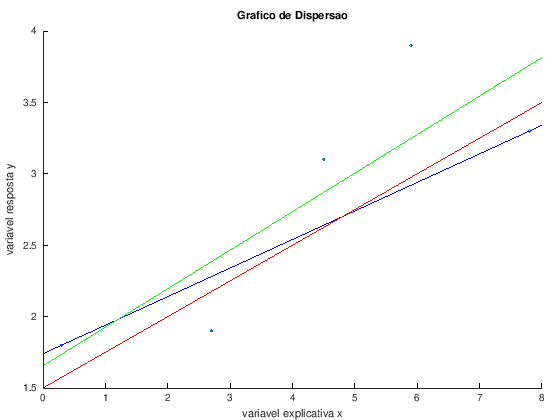

In [1]:
%Dados tabelados armazenados como vetor linha
xi = [0.3 2.7 4.5 5.9 7.8];
yi = [1.8 1.9 3.1 3.9 3.3];

%Numero de amostras
m = numel(xi);

%Inicializa??o dos somatórios da regressão
soma_xi = 0;
soma_yi = 0;
soma_xiyi = 0;
soma_xi2 = 0;

%Imprime o cabeçalho da tabela de regressão
fprintf('i\t\txi\t\tyi\t\txi^2\t\txiyi\t\tyi^2\n');
for i = 1 : m
    xi2 = xi(i)^2;
    xiyi = xi(i) * yi(i);
    yi2 = yi(i)^2;
    soma_xi = soma_xi + xi(i);
    soma_yi = soma_yi + yi(i);
    soma_xiyi = soma_xiyi + xiyi;
    soma_xi2 = soma_xi2 + xi2;
    %imprime os valores intermediários da regressão
    fprintf('%d\t%f\t%f\t%f\t%f\t%f\n', i, xi(i), yi(i), xi2, xiyi, yi2);
end

%calcula os coeficientes da reta de regressão linear dada pelo metodo dos
%minimos quadrados
b = (soma_xi * soma_yi - m * soma_xiyi) / (soma_xi^2 - m * soma_xi2);
a = (soma_yi - b * soma_xi) / m;
fprintf('a = %f\nb = %f', a, b);

hold on;

%Intervalo de projeção dos gráficos
x = 0:0.02:8;

%Desenha o grafico de dispersão das amostras coletadas
scatter(xi, yi);

%Desenha o grafico da reta que liga os pontos extremos da tabela
y = 1.74 + 0.2*x;
plot(x, y, 'b');

%Desenha o grafico da reta intermediaria
y = 1.5 + 0.25*x;
plot(x, y, 'r');

%Desenha o grafico da reta dada pelos coeficientes a e b da regress?o linear
y = a + b*x;
plot(x, y, 'g');

title('Grafico de Dispersao');
xlabel('variavel explicativa x');
ylabel('variavel resposta y');
hold off;

## Qualidade do ajuste

Nessa seção, serão apresentados dois parâmetros para aferir a qualidade do ajuste
obtido pela regressão linear: o coeficiente de determinação $r^2$ e a variância residual $\sigma^2$.

### Coeficiente de determinação

O coeficiente de determinação será calculado da forma seguinte:

$$r^2=\frac{SQReg}{SQTot} = \frac{SQTot - SQRes}{SQTot}=1-\frac{SQRes}{SQTot}$$
sendo

$\displaystyle\sum_i^m (y_i-\bar{y})^2= SQTot$ (Soma de quadrados totais)

$\displaystyle\sum_i^m (y_i-u_i)^2= SQRes$ (Soma de quadrados residual)

$\displaystyle\sum_i^m (u_i-\bar{y})^2= SQReg$ (Soma de quadrados devido à regressão)

Note que $0\leq r^2 \leq 1$ e que quanto mais próximo o valor de $r^2$ estiver da unidade, melhor será o ajuste. O coeficiente de determinação $r^2$ pode ser visto como a proporção da variação total dos dados em torno da média $\bar{y}$ que é explicada pelo modelo de regressão.

Outro ponto de destaque é que $D(a,b)=SQRes=\displaystyle\sum_i^m(y_i-u_i)^2$ e por uma manipulação algébrica é possível provar que
$SQTot=\displaystyle\sum_i^m (y_i-\bar{y})^2=\displaystyle\sum_i^m y^2_i - \frac{1}{m}\big(\displaystyle\sum_i^m y_i\big)^2$. 

Sendo assim, o coeficiente de determinação pode ser reescrito como

$$r^2 = 1 - \dfrac{D(a,b)}{\sum y^2_i - \frac{1}{m}\big(\sum y_i\big)^2}$$

### Variância residual
Um outro parâmetro importante para aferir a qualidade do ajuste é a variância residual $\sigma^2$ definida por $$\sigma^2 = \dfrac{D(a,b)}{m - 2}$$

onde $D(a,b)=SQRes$, $m$ é a quantidade de pontos tabelados e o número de parâmetros estimados é 2.

**Obs:** Tanto o numerador quanto o denominador de $\sigma^2$ irão diminuir se forem introduzidos mais parâmetros no modelo. Entretanto, se o valor $\sigma^2$ diminuir significa que mais parâmetros deverão ser incorporados ao modelo.

**Exemplo:** Calcular o coeficiente de determinação $r^2$ e variância residual da regressão linear apresentada anteriormente.

**Solução:** 
$$r^2 = 1 - \frac{D(a,b)}{\sum y^2_i - \frac{1}{m}\big(\sum y_i\big)^2}=
1 - \frac{0.9289}{42.56 - (14,5)^2/5}=0.7235$$
e
$$\sigma^2 =  \frac{D(a,b)}{m-2} = \frac{0.9289}{5-2} = 0.3096.$$

**Exercícios:** 

- Exercicio 1: Implementar funções para as equações dos coeficientes de determinação $r^2$ e a variância $sigma^2$

- Exercicio 2: Calcular $r^2$ e $sigma^2$ para a regressão acima usando as funções implementadas

## Regressão linear múltipla
Um modelo mais completo que relaciona a variável resposta $y$ com as $p$ variáveis explicativas $x_i$ é
$$y = a_0 + a_1 x_1 + \cdots + a_p x_p + \varepsilon,$$
onde $a_i$, $i=0,1,2,\dots,p$, são os parâmetros a serem estimados e $\varepsilon$ é uma variável aleatória desconhecida que interfere na verdadeira relação linear.

De modo similar à regressão linear simples, o método dos quadrados mínimos pode ser utilizado para estimar os $p+1$ parâmetros $a_i$. Analogamente, é possível descrever um sistema linear associado aos parâmetros $a_i$. 

O coeficiente de determinação $r^2$ e variância residual $\sigma^2$ são vistos no modelo de regressão linear múltipla como

$$r^2 = 1 - \dfrac{D(a_0,a_1, \cdots, a_p)}{\sum y^2_i - \frac{1}{m}\big(\sum y_i\big)^2}$$

e

$$\sigma^2 = \dfrac{D(a_0,a_1,\cdots, a_p)}{m - p - 1}$$


### Regressão polinomial
Um caso particular e importante da regressão linear múltipla é quando se relaciona a variável reposta com uma variável explicativa $x$, segundo o modelo
$$y = a_0 + a_1 x + a_2 x^2 \cdots + a_n x^n + \varepsilon,$$
denominado regressão polinomial. Em particular, o sistema gerado pelo método dos
quadrados mínimos é
\begin{equation*}
\left[
\begin{matrix}
m & \sum x_i & \sum x_i^2 & \cdots & \sum x_i^n \\
\sum x_i & \sum x_i^2 & \sum x_i^3 & \cdots & \sum x_i^{n+1} \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4 & \cdots & \sum x_i^{n+2} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum x_i^n & \sum x_i^{n+1} & \sum x_i^{n+2} & \cdots & \sum x_i^{2n} \\
\end{matrix}
\right]
\left[
\begin{array}{c}
a_{0}\\
a_{1}\\
a_{2}\\
\vdots \\
a_{n}\\
\end{array}
\right]
=
\left[
\begin{array}{c}
\sum y_i\\
\sum x_iy_i\\
\sum x_i^2y_i\\
\vdots \\
\sum x_i^ny_i\\
\end{array}
\right]
\end{equation*}



## Caso geral de ajuste com uma única variável $x$
O problema do ajuste de curvas consiste em escolhermos $n$ funções $g_1(x)$, $g_2(x)$, $\dots$, $g_n(x)$, contínuas e linearmente independentes tais que a função $u(x) = \alpha_1 g_1(x) + \alpha_2 g_2(x) + \dots + \alpha_n g_n(x)$ se aproxime ao máximo de $f(x)$. 

Dizemos que este modelo é um modelo linear porque os coeficientes a determinar $\alpha_1, \alpha_2, \dots, \alpha_n$, aparecem linearmente, embora as funções possam ser não lineares em $x$, como 
por exemplo, $g_1(x) = e^x$, $g_2 = (1+x^2)$ etc.

**Exemplo:** Ajustar a curva $f(x) = a \cdot cos(x) + b \cdot ln(x) + c \cdot e^{\frac{x}{4}}$ aos dados tabelados utilizando o método dos quadrados mínimos.

\begin{array}{|c|c|c|c|c|c|c|c|c|}
	\hline  x & 0.1 & 0.4 & 0.9 & 1.2  & 3.7 & 5.5 & 6.4 & 8.3 \\ 
	\hline  y & -5.0  & -3.5 & -3.0 & -4.0 & -10.0 & -10.3 & -13.0  & -28.0 \\ 
	\hline 
\end{array} 

**Solução:**

- Obter o sistema linear por quadrados mínimos:

Como $u(x_i) = a cos(x_i) + b ln(x_i) + c e^{\frac{x_i}{4}}$ então
$$D(a,b,c) = \displaystyle\sum_{i=1}^m( y_i - u_i)^2 = 
\displaystyle\sum_{i=1}^m( y_i - a cos(x_i) - b ln(x_i) - c e^{\frac{x_i}{4}})^2$$

- Obtendo as derivadas parciais:
$$\frac{\partial D}{\partial a}=-2 \displaystyle\sum_{i=1}^m( y_i - a cos(x_i) - b ln(x_i) - c e^{\frac{x_i}{4}}) cos(x_i)$$
$$\frac{\partial D}{\partial b}=-2 \displaystyle\sum_{i=1}^m( y_i - a cos(x_i) - b ln(x_i) - c e^{\frac{x_i}{4}}) ln(x_i)$$
$$\frac{\partial D}{\partial c}=-2 \displaystyle\sum_{i=1}^m( y_i - a cos(x_i) - b ln(x_i) - c e^{\frac{x_i}{4}}) e^{\frac{x_i}{4}}$$

- Igualando a zero e obtendo o sistema linear:
\begin{equation*}
\left[
\begin{matrix}
\sum cos(x_i) cos(x_i) & \sum cos(x_i) ln(x_i) & \sum cos(x_i)e^{\frac{x_i}{4}}\\
\sum ln(x_i) cos(x_i) & \sum ln(x_i) ln(x_i) & \sum ln(x_i) e^{\frac{x_i}{4}}\\
\sum e^{\frac{x_i}{4}} cos(x_i) & \sum e^{\frac{x_i}{4}} ln(x_i) & \sum e^{\frac{x_i}{4}} e^{\frac{x_i}{4}}\\
\end{matrix}
\right]
\left[
\begin{array}{c}
a\\
b\\
c\\
\end{array}
\right]
=
\left[
\begin{array}{c}
\sum cos(x_i) y_i\\
\sum ln(x_i) y_i\\
\sum e^{\frac{x_i}{4}}y_i\\
\end{array}
\right]
\end{equation*}

- Substituindo os valores numéricos:
\begin{equation*}
\left[
\begin{matrix}
4.7501 & -2.1052 & 5.4533\\
-2.1052 & 18.7281 &  32.8318\\
5.4533 &  32.8318 & 115.6321\\
\end{matrix}
\right]
\left[
\begin{array}{c}
a\\
b\\
c\\
\end{array}
\right]
=
\left[
\begin{array}{c}
-11.164\\
-99.723\\
-371.504\\
\end{array}
\right]
\end{equation*}

- Resolvendo o sistema:
$a=2.7958$, $b=1.6983$ e $c=-3.8269$

- Calculando o coeficiente de determinação $r^2$ e a variância residual:
$$r^2= 1 - \frac{D(a,b,c)}{\sum y^2_i - \frac{1}{m}\big(\sum y_i\big)^2} = 1 - \frac{0.21643}{1221.3 - (-76.8)^2/8} = 0.99955$$
e
$$\sigma^2 = \frac{D(a,b,c)}{m-p-1} = \frac{0.21643}{8-3} = 0.043286.$$



In [1]:
graphics_toolkit("gnuplot")

In [5]:
%Dados tabelados armazenados como vetor linha
xi = [ 0.1  0.4  0.9  1.2   3.7   5.5   6.4   8.3];
yi = [-5.0 -3.5 -3.0 -4.0 -10.0 -10.3 -13.0 -28.0];

%Numero de amostras
m = numel(xi);

%a) Inicializar os somatórios da regressão usando uma matriz A (3x3) e B (3x1)
A = zeros(3);
A(1,1) = sum(cos(xi).*cos(xi));
A(1,2) = sum(cos(xi).*log(xi));

In [6]:
A

A =2004l

   4.7501  -2.1052        0
        0        0        0
        0        0        0



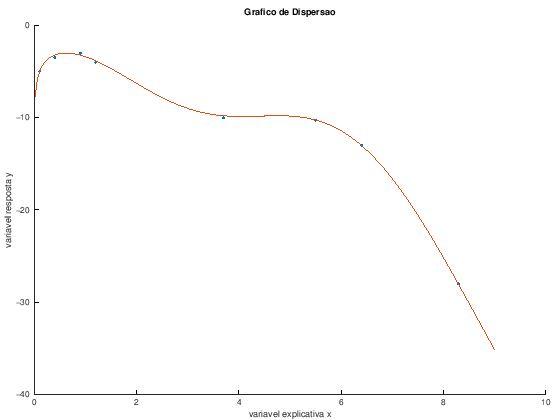

In [7]:
%b) Imprimir o cabeçalho da tabela de regressão
for i = 1 : m
    %c) Imprimir os valores intermediários da regressão
end

%d) Calcular os coeficientes a, b e c da regress?o polinomial dada pelo metodo dos minimos quadrados
a = 2.7958; b = 1.6983; c = -3.8269;

hold on;

%Intervalo de projeção dos gráficos
x = 0:0.02:9;

%Desenha o grafico de dispersão das amostras coletadas
scatter(xi, yi);


%Desenha o grafico da reta dada pelos coeficientes a e b da regressão linear
y = a*cos(x) + b*log(x) + c*exp(x/4);

plot(x, y);

title('Grafico de Dispersao');
xlabel('variavel explicativa x');
ylabel('variavel resposta y');
hold off;

**Exercício:**  Calcular $r^2$ e $sigma^2$ para a regressão acima usando as funções implementadas anteriormente.

ans = 451


## Transformações não lineares

Modelos não lineares nos parâmetros podem ser transformados em modelos lineares para simples substituição de variáveis por funções dessas variáveis, por exemplo,
\begin{equation*}
\begin{array}{l}
y = ax^b \implies  log(y) = log(a) + b\, log(x);\\[0.5cm]
y = ab^x \implies  log(y) = log(a) + log(b) x;\\[0.5cm]
y = a e^{bx} = \implies ln(y) = ln(a) + bx;\\[0.5cm]
y = \frac{1}{a + b x} \implies \frac{1}{y} = a + bx\\
\end{array}
\end{equation*}

**Exemplo:** Em uma reação química de primeira ordem, a constante $k$ de velocidade se relaciona com a concentração $c$ e o tempo $t$ pela expressão
$$c = c_0 e^{-kt}$$

Utilizando o método dos quadrados mínimos sobre a tabela a seguir, determine o valor de $c_0$ e $k$.
\begin{array}{|c|c|c|c|c|c|}
	\hline i & 1 & 2 & 3 & 4 & 5 \\ 
	\hline t & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 \\ 
	\hline c & 0.56 & 0.32 & 0.21 & 0.11 & 0.08 \\ 
	\hline 
\end{array} 

**Solução:**

- Linearizando a equação:

$c = c_0 e^{-kt} \implies ln(c) = ln(c_0) - kt \implies z = \alpha + \beta t$

Fazendo $z = ln(y)$, $\alpha = ln(c_0)$ e $\beta = -k$.

- Montando o sistema linear:

\begin{equation*}
\left[
\begin{array}{cc}
m & \sum t_i \\
\sum t_i & \sum t^2_i\\
\end{array}
\right]
\left[
\begin{array}{c}
\alpha\\
\beta\\
\end{array}
\right]
=
\left[
\begin{array}{c}
\sum z_i\\
\sum z_i t_i\\
\end{array}
\right]
\end{equation*}

- Resolvendo o sistema:

\begin{equation*}
\left[
\begin{array}{cc}
5 & 1.5 \\
1.5 & 0.55\\
\end{array}
\right]
\left[
\begin{array}{c}
\alpha\\
\beta\\
\end{array}
\right]
=
\left[
\begin{array}{c}
\sum -8.0129\\
\sum -2.8998\\
\end{array}
\right]
\implies
\alpha = -0.11479 \mathsf{~e~} \beta = -4.9593
\end{equation*}

- Transformando as variáveis:

$$\alpha = ln(c_0) \implies c_0 = e^\alpha = e^{-0.11479} = 0.8916$$

e

$$\beta = -k \implies k = -\beta = -(-4.9593) = 4.9593$$

### Teste de alinhamento
Uma vez escolhida uma função não linear em $\alpha_1$, $\alpha_2$, ..., $\alpha_n$ para ajustar uma função dada, uma forma de verificarmos se a escolha feita foi razoável seria aplicarmos o teste de alinhamento, que consiste em:
- fazer a **linearização** da função escolhida;
- fazer o diagrama de dispersão dos novos dados;
- se os pontos do diagrama estiverem alinhados, isto significará que a função não linear escolhida foi uma **boa escolha**.

**Exemplo:** Verificar qual das funções não lineares proporcionará um melhor ajuste $f(x) = a e^{bx}$ ou $g(x) = \frac{1}{a + b \,x}$ aos dados tabelados
\begin{array}{|c|c|c|c|c|c|}
    \hline i & 1 & 2 & 3 & 4 & 5 \\ 
    \hline x & 0.1 & 0.3 & 0.5 & 0.8 & 1.0 \\ 
    \hline y & 1.1 & 1.3 & 1.7 & 2.2 & 2.7 \\ 
    \hline 
\end{array} 



**Solução:**
$$y=a\, e^{bx} \implies ln(y) = ln(a) + bx \implies z_1 = \alpha + \beta x$$ 
e
$$y=\frac{1}{a + bx} \implies \frac{1}{y} = a + bx \implies z_2 = \alpha + \beta x$$

\begin{array}{|c|c|c|c|c|c|}
    \hline i & 1 & 2 & 3 & 4 & 5 \\ 
    \hline x & 0.1 & 0.3 & 0.5 & 0.8 & 1.0 \\ 
    \hline z_1 & 0.09531 &  0.262364 &   0.530628 &  0.788457 &  0.993252\\
    \hline z_2 &0.90909  & 0.76923 &  0.58824 &  0.45455 &  0.37037\\
    \hline
\end{array} 


In [8]:
x = [0.1 0.3 0.5 0.8 1.0]
y = [1.1 1.3 1.7 2.2 2.7]


x =2004l

   0.1000   0.3000   0.5000   0.8000   1.0000

y =2004h

   1.1000   1.3000   1.7000   2.2000   2.7000



In [9]:
xi = x;
yi = log(y);

%Numero de amostras
m = numel(xi);

soma_xi = 0;
soma_yi = 0;
soma_xiyi = 0;
soma_xi2 = 0;
soma_yi2 = 0;

fprintf('i\t\txi\t\tyi\t\txi^2\t\txiyi\t\tyi^2\n');
for i = 1 : m
    xi2 = xi(i)^2;
    xiyi = xi(i) * yi(i);
    yi2 = yi(i)^2;
    soma_xi = soma_xi + xi(i);
    soma_yi = soma_yi + yi(i);
    soma_xiyi = soma_xiyi + xiyi;
    soma_xi2 = soma_xi2 + xi2;
    soma_yi2 = soma_yi2 + yi2;
    fprintf('%d\t%f\t%f\t%f\t%f\t%f\n', i, xi(i), yi(i), xi2, xiyi, yi2);
end

b = (soma_xi * soma_yi - m * soma_xiyi) / (soma_xi^2 - m * soma_xi2);
a = (soma_yi - b * soma_xi) / m;

ui = a + b*xi;
D_ab = sum((yi-ui).^2);
r2 =  1 - (D_ab/(soma_yi2-(1/m)*(soma_yi^2)));
s2 = D_ab / (m-2);

fprintf('a = %f, b = %f, r2 = %f, s2 = %f\n', a, b, r2, s2);

i		xi		yi		xi^2		xiyi		yi^22004l
1	0.100000	0.095310	0.010000	0.009531	0.0090844l
2	0.300000	0.262364	0.090000	0.078709	0.068835
3	0.500000	0.530628	0.250000	0.265314	0.281566
4	0.800000	0.788457	0.640000	0.630766	0.621665
5	1.000000	0.993252	1.000000	0.993252	0.986549
a = -0.009820, b = 1.007078, r2 = 0.995666, s2 = 0.000783[?2004l


In [10]:
[p,S] = polyfit(xi, yi, 1);
r2 = 1 - (S.normr/norm(yi - mean(yi)))^2;
s2 = (S.normr)^2 / (m-2);
fprintf('a = %f, b = %f, r2 = %f, s2 = %f\n', p(2), p(1), r2, s2);

a = -0.009820, b = 1.007078, r2 = 0.995666, s2 = 0.000783


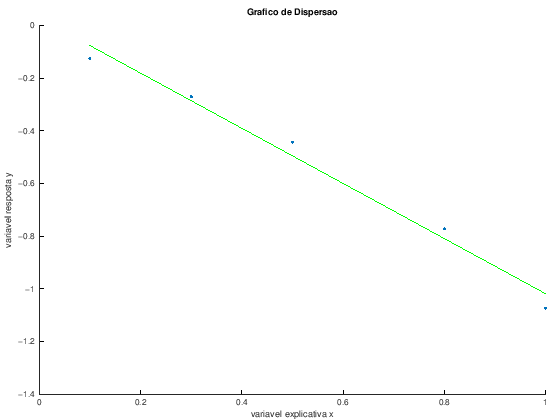

In [11]:
%Desenha o grafico de dispersão das amostras coletadas
scatter(xi, yi);
hold on;
%Desenha o grafico da reta dada pelos coeficientes a e b da regress?o linear
y = a + b*x;
plot(x, y, 'g');

title('Grafico de Dispersao');
xlabel('variavel explicativa x');
ylabel('variavel resposta y');
hold off;

In [11]:
xi = x;
yi = 1./y;

%Numero de amostras
m = numel(xi);

soma_xi = 0;
soma_yi = 0;
soma_xiyi = 0;
soma_xi2 = 0;
soma_yi2 = 0;

fprintf('i\t\txi\t\tyi\t\txi^2\t\txiyi\t\tyi^2\n');
for i = 1 : m
    xi2 = xi(i)^2;
    xiyi = xi(i) * yi(i);
    yi2 = yi(i)^2;
    soma_xi = soma_xi + xi(i);
    soma_yi = soma_yi + yi(i);
    soma_xiyi = soma_xiyi + xiyi;
    soma_xi2 = soma_xi2 + xi2;
    soma_yi2 = soma_yi2 + yi2;
    fprintf('%d\t%f\t%f\t%f\t%f\t%f\n', i, xi(i), yi(i), xi2, xiyi, yi2);
end

b = (soma_xi * soma_yi - m * soma_xiyi) / (soma_xi^2 - m * soma_xi2);
a = (soma_yi - b * soma_xi) / m;

ui = a + b*xi;
D_ab = sum((yi-ui).^2);
r2 =  1 - (D_ab/(soma_yi2-(1/m)*(soma_yi^2)));
s2 = D_ab / (m-2);

fprintf('a = %f, b = %f, r2 = %f, s2 = %f\n', a, b, r2, s2);


i		xi		yi		xi^2		xiyi		yi^22004l
1	0.100000	0.909091	0.010000	0.090909	0.8264464l
2	0.300000	0.769231	0.090000	0.230769	0.591716
3	0.500000	0.588235	0.250000	0.294118	0.346021
4	0.800000	0.454545	0.640000	0.363636	0.206612
5	1.000000	0.370370	1.000000	0.370370	0.137174
a = 0.942693, b = -0.600738, r2 = 0.976916, s2 = 0.001512[?2004l


In [12]:
[p,S] = polyfit(xi, yi, 1);
r2 = 1 - (S.normr/norm(yi - mean(yi)))^2;
s2 = (S.normr)^2 / (m-2);
fprintf('a = %f, b = %f, r2 = %f, s2 = %f\n', p(2), p(1), r2, s2);

a = 0.942693, b = -0.600738, r2 = 0.976916, s2 = 0.001512


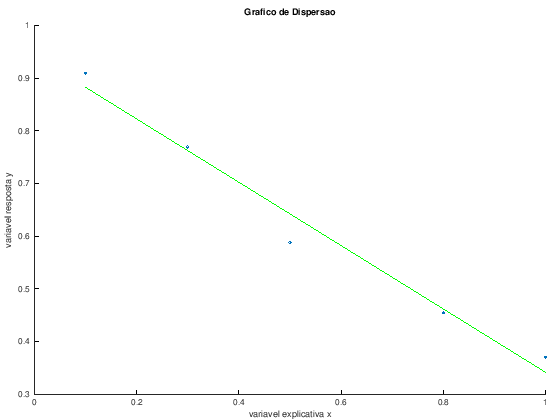

In [8]:
%Desenha o grafico de dispersão das amostras coletadas
scatter(xi, yi);
hold on;
%Desenha o grafico da reta dada pelos coeficientes a e b da regress?o linear
y = a + b*x;
plot(x, y, 'g');

title('Grafico de Dispersao');
xlabel('variavel explicativa x');
ylabel('variavel resposta y');
hold off;